In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#load data
df=pd.read_csv('dataset_k_means.csv')

In [47]:
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [48]:
#view all statistical information
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [49]:
#segregate my dataset
#actually i is dataset i have to drop name 
new_df=df[['Age','Income($)']]

In [50]:
new_df.head(5)

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


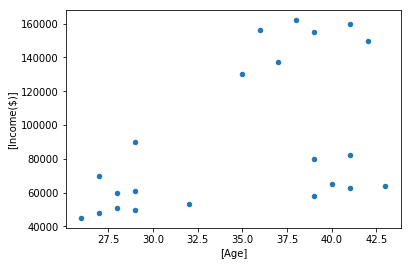

In [51]:
new_df.plot.scatter(x=['Age'],y=['Income($)'])


Now i have to  scale my dataset using sklearn preprocessing
from †his scatter plot we can see that the x axis is ve musch less than the income (y) plot so we have to 
normalize it


In [52]:
#load preprocessing
scaler=MinMaxScaler()
scaler.fit(new_df)
preprocessed_data=scaler.fit_transform(new_df)

In [53]:
preprocessed_df=pd.DataFrame(preprocessed_data,columns=['Age','Income($)'])

In [54]:
preprocessed_df.head(5)

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


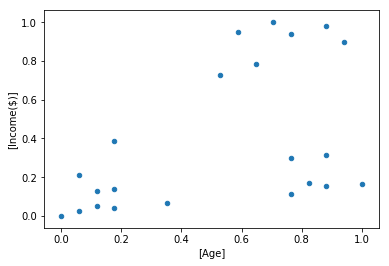

In [55]:
preprocessed_df.plot.scatter(x=['Age'],y=['Income($)'])

In [60]:
kmeans = KMeans(n_clusters=3).fit(preprocessed_df)

In [61]:
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [62]:
kmeans.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [63]:
preprocessed_df['cluster']=kmeans.labels_

In [67]:
preprocessed_df.head(6)

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1


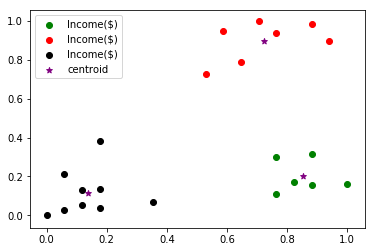

In [68]:
df1 = preprocessed_df[preprocessed_df.cluster==0]
df2 = preprocessed_df[preprocessed_df.cluster==1]
df3 = preprocessed_df[preprocessed_df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [74]:
from IPython.display import Image
from IPython import display

Elbow functionality
find out sum of squared error SSE
draw [k vs SSE]

In [75]:
sse = []
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(preprocessed_df[['Age','Income($)']])
    sse.append(kmeans.inertia_)

In [76]:
#you can see the value is droping
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668416,
 0.22443334487241418,
 0.18146018747488601,
 0.13706529523670866,
 0.10383752586603559]

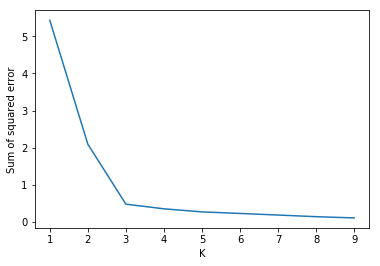

In [77]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)